In [2]:
import numpy as np
import librosa
import librosa.display

import matplotlib.pyplot as plt
import os
import math

In [3]:
def extract_spectrogram(file_path,save_dir, type="npy"):
    # file_path : "C:\어쩌구\000002 KEY 0 with noise 5.mp3" or "C\어쩌구\000002 KEY 0.mp3"
    # file_name : 000002
    try:
        y, sr = librosa.load(file_path, sr=None)
        print(file_path, "sampling rate is", sr)
        y = librosa.stft(y)
        spectrogram = librosa.amplitude_to_db(np.abs(y), ref=np.max)
        
        if (type=="npy"):
            save_path = save_dir+os.path.splitext(os.path.basename(file_path))[0]+"_spec.npy"
            np.save(save_path, spectrogram)
            return
        
        if (type=="jpg"):
            save_path = save_dir+os.path.splitext(os.path.basename(file_path))[0]+"_spec.jpg"
            plt.figure(figsize=(10, 4))
#             librosa.display.specshow(spectrogram, sr=sr)
            librosa.display.specshow(spectrogram, y_axis='log', x_axis='time', sr=sr)
            plt.axis('off')
            plt.tight_layout()
            # sppectrogram .jpg 저장
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()
        
    except Exception as e:
        print(f"Error extracting spectrogram for {file_path}: {e}")
        return None
    

def extract_chromagram_stft(file_path,save_dir, type="npy"):
    try:
        y, sr = librosa.load(file_path, sr=None)
        chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
        
        if (type=="npy"):
            save_path = save_dir+os.path.splitext(os.path.basename(file_path))[0]+"_chro.npy"
            np.save(save_path, chromagram)
            return
        
        if (type=="jpg"):
            save_path = save_dir+os.path.splitext(os.path.basename(file_path))[0]+"_chro.jpg"
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(chromagram, sr=sr)
            plt.axis('off')
            plt.tight_layout()
            # mfcc.jpg 저장
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()
            return
  
    except Exception as e:
        print(f"Error extracting chromagram for {file_path}: {e}")
        return None
        

In [3]:
def extract_mfcc(file_path, save_dir, type="npy"):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        
        if (type=="npy"):
            save_path = save_dir+os.path.splitext(os.path.basename(file_path))[0]+"_mfcc.npy"
            np.save(save_path, mfcc)
            return
            
        if (type=="jpg"):
            save_path = save_dir+os.path.splitext(os.path.basename(file_path))[0]+"_mfcc.jpg"
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mfcc, sr=sr)
            plt.axis('off')
            plt.tight_layout()
            # mfcc.jpg 저장
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()
            return
        
    except Exception as e:
        print(f"Error extracting MFCC for {file_path}: {e}")
        return None

In [4]:
save_dir = "./save_dir/"

root_dir = "./sound_sample"
for (root,dirs,files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            extract_spectrogram(root_dir+"/"+file_name, save_dir,"npy")
            extract_spectrogram(root_dir+"/"+file_name, save_dir,"jpg")
            extract_chromagram_stft(root_dir+"/"+file_name, save_dir,"npy")
            extract_chromagram_stft(root_dir+"/"+file_name, save_dir,"jpg")
            extract_mfcc(root_dir+"/"+file_name, save_dir,"npy")
            extract_mfcc(root_dir+"/"+file_name, save_dir,"jpg")
    
    

NameError: name 'extract_spectrogram' is not defined

(1025, 1902)
[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


In [15]:
# convert spectrogram to spiral
test = np.load("./save_dir/demo_spec.npy")
test = (test+80)/8
print(test.shape)
print(np.argmax(test[0]))

time_slot = test.shape[1]
freq_slot = test.shape[0]


(1025, 1902)
1037


In [16]:
def polar_to_cartesian(r, theta):
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x, y

sampling_rate = 44100 # Hz
freq_initial = 55 # initial freq A1
r_init = 1/55
theta_init = (np.pi/2)
print(polar_to_cartesian(r_init, theta_init))

real_time = time_slot * (512/sampling_rate)


freq_list = np.array(range(1025)[1:])*(22050/1024)
r_list = 1/freq_list
theta_list = (np.pi/2) - 2*np.pi*np.log2(freq_list/freq_initial)
print(theta_list)

(1.1133152719521393e-18, 0.01818181818181818)
[ 10.07112093   3.78793562   0.11250783 ... -52.7430103  -52.75187555
 -52.76073214]


0.00013421939103194265 -42.92521122325232
0.00013383259163415607 -42.95137205030959
0.00013344801522141423 -42.97745759430724
0.0001330656426849632 -43.00346828728668
0.00013268545513443473 -43.029404557580804
0.00013230743389473548 -43.055266829856286
0.00013193156050298908 -43.08105552515535
0.0001315578167055302 -43.10677106093685
0.0001311861844549496 -43.132413851116866
0.00013081664590718916 -43.15798430610862
0.00013044918341868582 -43.18348283286195
0.00013008377954356346 -43.20890983490213
0.00012972041703087194 -43.23426571236819
0.0001293590788218723 -43.25955086205074
0.0001289997480473671 -43.28476567742914
0.00012864240802507523 -43.30991054870836
0.00012828704225705014 -43.33498586285509
0.00012793363442714092 -43.35999200363356
0.00012758216839849494 -43.38492935164074
0.00012723262821110178 -43.40979828434111
0.00012688499807937746 -43.434599176100924
0.00012653926238978788 -43.459332398222074
0.00012619540569851128 -43.48399831897537
0.00012585341272913864 -43.5085973

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

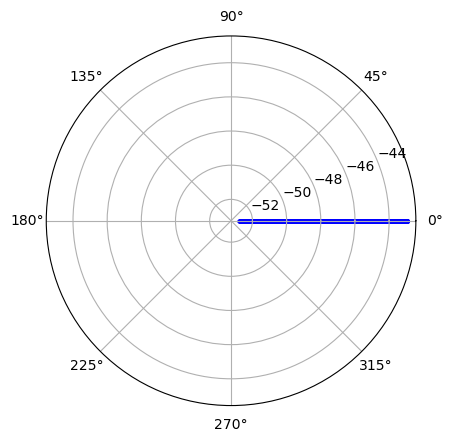

In [17]:

# spiral format (r, theta, time, amp(dB))
for i in range(time_slot):
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    A = test[i][1:]
    for j in range(len(freq_list)):
        if A[j]==0: continue
        print(r_list[j],theta_list[j])
        ax.scatter(r_list[j],theta_list[j], color='blue', marker='o',s=A[j])
    plt.savefig(f"./save/polar_coordinates_plot_{i}.png")

    

